In [1]:
import sys

sys.path.append("../../")

from models.CNN import feature_extraction as fe
from utils import load_csv
import tifffile as tiff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2024-11-22 16:41:56.345213: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1732290116.380665  248649 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1732290116.390011  248649 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-22 16:41:56.424843: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


/home/thibaud/majority-vote-outlier-detection/models/CNN/../../utils/load_csv.py:20: DtypeWarning: Columns (91,94,209,213) have mixed types. Specify dtype option on import or set low_memory=False.
  frame = pd.read_csv(data_path, delimiter=";").iloc[:, -3:]


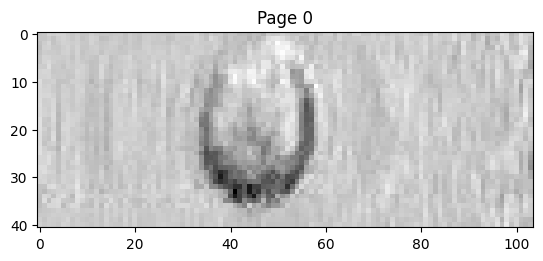

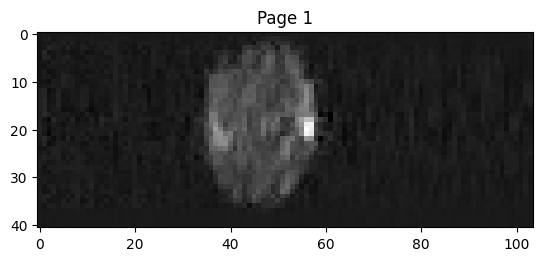

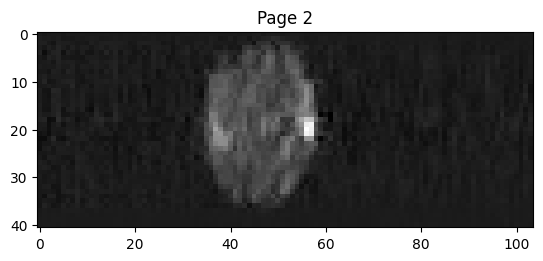

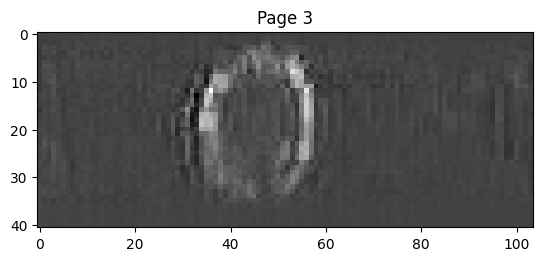

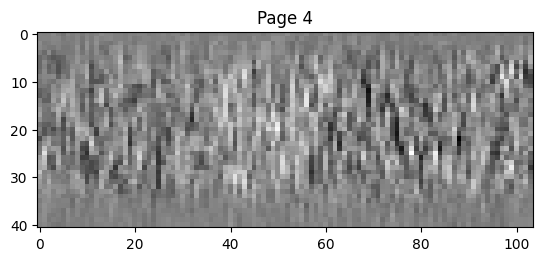

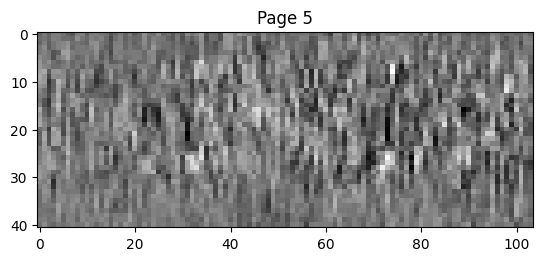

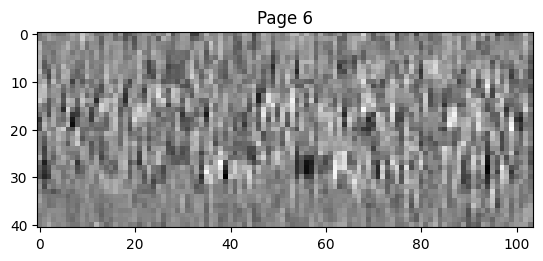

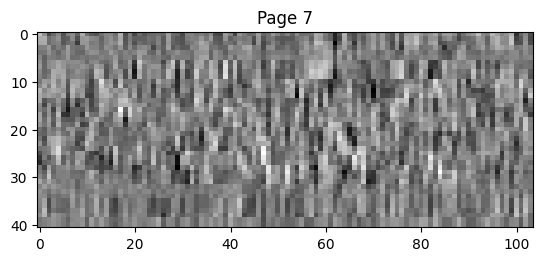

error: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/canny.cpp:829: error: (-215:Assertion failed) _src.depth() == CV_8U in function 'Canny'


In [2]:
sample_data = load_csv.sample_data(
        load_csv.get_correct_data(load_csv.load_pandas()), 1
    )

img = tiff.imread(sample_data["file_names"].iloc[0])

for i, page in enumerate(img):
    plt.imshow(page, cmap="gray")
    plt.title(f"Page {i}")
    plt.show()

extracted_features, _ = fe.standardize(sample_data)

plt.title("Standardized features")
plt.imshow(extracted_features.squeeze(), cmap="gray")
plt.show()